<a href="https://colab.research.google.com/github/jesslyngowin/crops-classifier/blob/main/kel5_p2_daming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data loading

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Crop_production.csv")
df.head()

,Unnamed: 0,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120.0,40.0,20.0,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20.0,60.0,20.0,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80.0,40.0,40.0,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80.0,40.0,20.0,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20.0,40.0,20.0,5.68,654.34,29.266667,1300.0,500.0,0.384615


# EDA

In [ ]:
print('Data Shape: ', df.shape)

Data Shape:  (84734, 13)


In [ ]:
#check data types
df.dtypes

Unnamed: 0              int64
State_Name             object
Crop_Type              object
Crop                   object
N                     float64
P                     float64
K                     float64
pH                    float64
rainfall              float64
temperature           float64
Area_in_hectares      float64
Production_in_tons    float64
Yield_ton_per_hec     float64
dtype: object

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'State_Name',	'Crop_Type', 'Area_in_hectares',	'Production_in_tons','Yield_ton_per_hec'])

In [ ]:
df.isna().sum()

Crop           1
N              1
P              1
K              1
pH             1
rainfall       1
temperature    1
dtype: int64

In [ ]:
df.duplicated().sum()

72463

In [ ]:
df['Crop'].nunique()

52

In [ ]:
print(df['Crop'].value_counts())

Crop
rice           9673
maize          8220
moong          5547
sesamum        5311
wheat          5247
jowar          4634
rapeseed       4585
potato         4490
onion          4357
sunflower      3207
cotton         2696
barley         2643
ragi           2557
sweetpotato    2489
horsegram      2317
turmeric       2267
banana         2016
soyabean       1966
coriander      1945
garlic         1809
arecanut        979
tapioca         955
jute            893
cashewnuts      604
blackpepper     443
mango           326
tomato          284
brinjal         282
papaya          281
ladyfinger      217
cardamom        213
orange          146
cabbage         125
pineapple       117
cauliflower     105
grapes          104
jackfruit        90
drumstick        73
cucumber         72
bittergourd      67
watermelon       59
blackgram        58
bottlegourd      58
radish           45
pumpkin          37
carrot           28
ashgourd         28
pomegranate      24
ridgegourd       21
beetroot       

<ipython-input-9-3946ad4ab471>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_counts.index, x=crop_counts.values, palette='viridis')


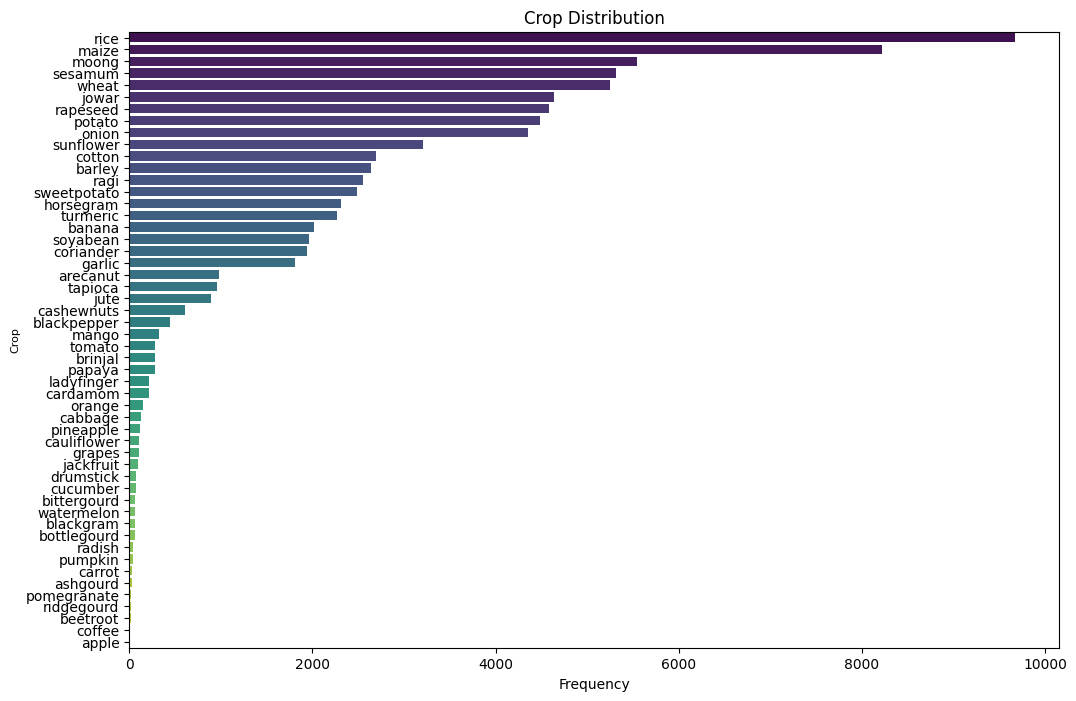

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

crop_counts = df['Crop'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=crop_counts.index, x=crop_counts.values, palette='viridis')
plt.title('Crop Distribution')
plt.xlabel('Frequency')
plt.ylabel('Crop', fontsize=8)
plt.show()

In [ ]:
df.describe()

,N,P,K,pH,rainfall,temperature
count,84733.000000,84733.000000,84733.000000,84733.000000,84733.000000,84733.000000
mean,69.853481,41.579668,42.279985,5.643724,710.758792,26.700018
std,39.505371,15.172540,28.644870,0.508329,604.767736,4.835170
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000
25%,50.000000,40.000000,20.000000,5.360000,167.380000,23.106000
50%,75.000000,40.000000,30.000000,5.540000,607.480000,27.333333
75%,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667


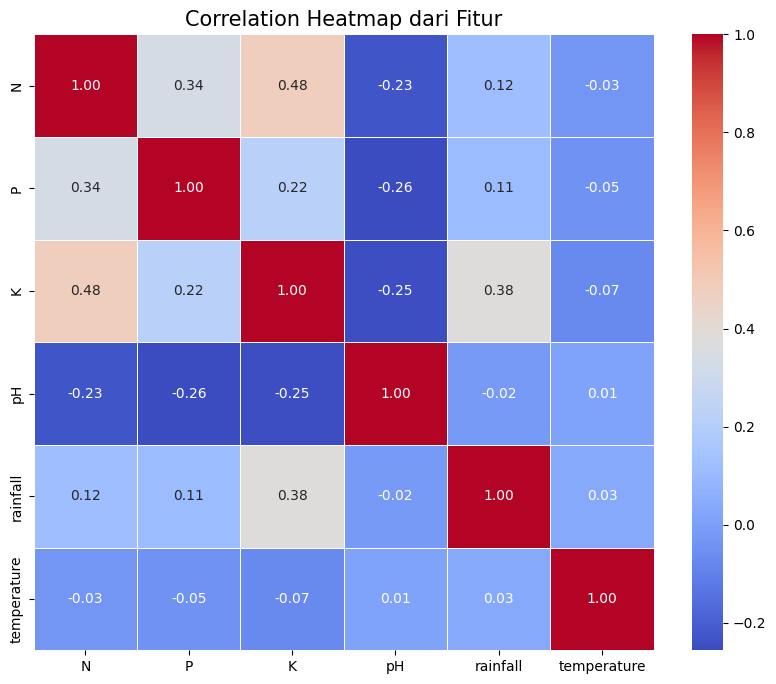

In [ ]:
features = ['N', 'P', 'K', 'pH', 'rainfall', 'temperature']
corr_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap dari Fitur', fontsize=15)
plt.show()

# Preprocess

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
chosen_crops = ['rice', 'maize', 'potato', 'sesamum', 'onion', 'cotton', 'ragi', 'turmeric', 'banana', 'sweetpotato', 'soyabean', 'garlic', 'wheat', 'barley', 'coriander', 'tapioca', 'arecanut', 'jute', 'mango', 'papaya', 'cashewnuts']
filtered_df = df[df['Crop'].isin(chosen_crops)]

#reset index
filtered_df.reset_index(drop=True, inplace=True)

new_df = filtered_df
new_df['Crop'].value_counts()

Crop
rice           1055
maize           850
potato          758
sesamum         711
onion           611
cotton          483
ragi            472
turmeric        406
sweetpotato     356
banana          344
garlic          323
soyabean        313
wheat           295
coriander       263
barley          254
tapioca         200
jute            155
arecanut        150
mango           150
papaya          145
cashewnuts      125
Name: count, dtype: int64

In [ ]:
print('Duplicated data:', new_df.duplicated().sum())

Duplicated data: 0


In [ ]:
#remove outlier
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for feature in features:
    new_df = new_df[(new_df[feature] >= lower_bound[feature]) & (new_df[feature] <= upper_bound[feature])]

new_df.reset_index(drop=True, inplace=True)

print("Data shape setelah penghapusan outlier:", new_df.shape)

Data shape setelah penghapusan outlier: (7795, 7)


<ipython-input-16-fbda3103d33f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=new_crop_count.index, x=new_crop_count.values, palette='viridis')


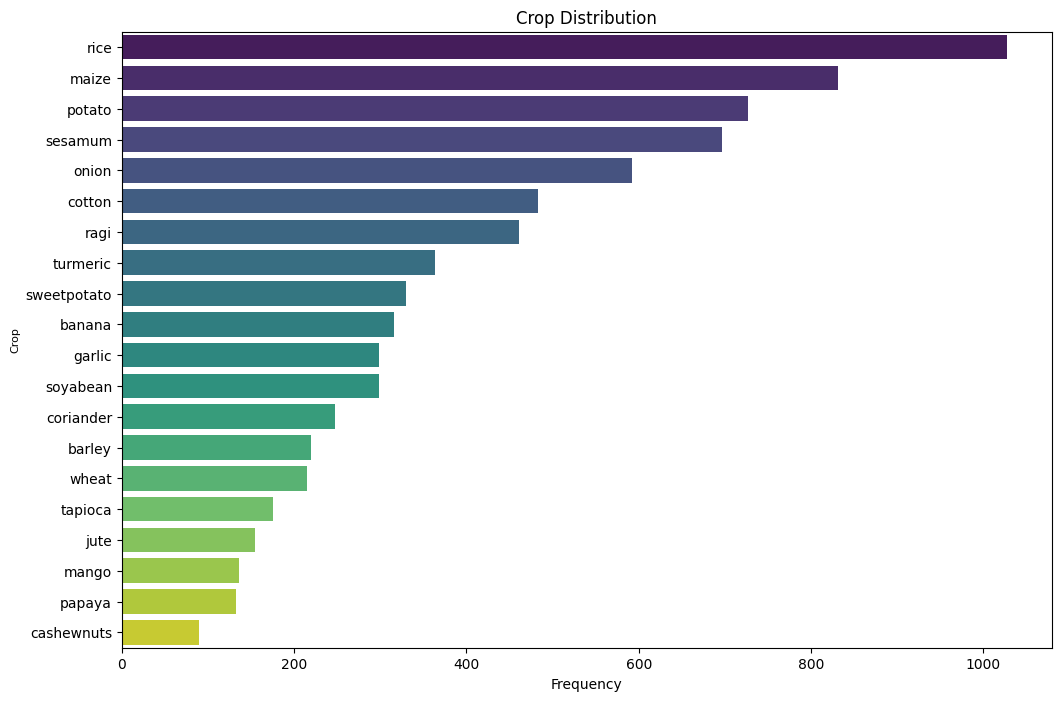

In [ ]:
new_crop_count = new_df['Crop'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=new_crop_count.index, x=new_crop_count.values, palette='viridis')
plt.title('Crop Distribution')
plt.xlabel('Frequency')
plt.ylabel('Crop', fontsize=8)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
#encode Crop
crop_label_encoder = LabelEncoder()
new_df['Crop'] = crop_label_encoder.fit_transform(new_df['Crop'])

#get original label dari crop
crop_labels = crop_label_encoder.classes_
print("Original Crop Labels:")
for i, label in enumerate(crop_labels):
    print(f"Encoded Label {i}: {label}")

Original Crop Labels:
Encoded Label 0: banana
Encoded Label 1: barley
Encoded Label 2: cashewnuts
Encoded Label 3: coriander
Encoded Label 4: cotton
Encoded Label 5: garlic
Encoded Label 6: jute
Encoded Label 7: maize
Encoded Label 8: mango
Encoded Label 9: onion
Encoded Label 10: papaya
Encoded Label 11: potato
Encoded Label 12: ragi
Encoded Label 13: rice
Encoded Label 14: sesamum
Encoded Label 15: soyabean
Encoded Label 16: sweetpotato
Encoded Label 17: tapioca
Encoded Label 18: turmeric
Encoded Label 19: wheat


# Feature selection

In [ ]:
fitur = new_df[['N', 'P', 'K', 'pH', 'rainfall', 'temperature']]
target = new_df['Crop']

acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
#70 train 30 test split
X_train, X_test, y_train, y_test = train_test_split(fitur,target,test_size = 0.3,random_state=2)
#80 train 20 test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(fitur,target,test_size = 0.2,random_state=2)

# Modeling

## 70:30 split (disebut DT1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
}

dt_classifier = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_

print("Best parameters for 70:30 split found:")
print(best_params)

Best parameters for 70:30 split found:
{'criterion': 'entropy', 'max_depth': 10}


In [ ]:
#modeling for 70:30 split
DT1 = DecisionTreeClassifier(**best_params)
DT1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## 80:20 split (disebut DT2)

In [ ]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
}

dt_classifier = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10)
grid_search.fit(X_train2, y_train2)

# Get the best parameters and best score
best_params2 = grid_search.best_params_

print("Best parameters for 80:20 split found:")
print(best_params2)

Best parameters for 80:20 split found:
{'criterion': 'entropy', 'max_depth': 10}


In [ ]:
#modeling for 80:20 split
DT2 = DecisionTreeClassifier(**best_params2)
DT2.fit(X_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Evaluation

## 70:30 split (DT1)

In [ ]:
print("70:30 Model (DT1) Evaluation")

predicted_values = DT1.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DT1 Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values, target_names=crop_labels))

70:30 Model (DT1) Evaluation
DT1 Decision Tree's Accuracy is:  97.13552800342026
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        89
      barley       1.00      1.00      1.00        65
  cashewnuts       1.00      1.00      1.00        28
   coriander       1.00      1.00      1.00        68
      cotton       1.00      1.00      1.00       144
      garlic       1.00      1.00      1.00        85
        jute       0.23      0.20      0.21        46
       maize       1.00      1.00      1.00       271
       mango       1.00      1.00      1.00        35
       onion       1.00      1.00      1.00       166
      papaya       1.00      1.00      1.00        40
      potato       1.00      1.00      1.00       230
        ragi       1.00      1.00      1.00       138
        rice       0.88      0.90      0.89       306
     sesamum       1.00      1.00      1.00       225
    soyabean       1.00      1.00      1.00        90


In [ ]:
from sklearn.model_selection import cross_val_score

#cross validation
score = cross_val_score(DT1, fitur, target,cv=10)
print('DT1 Cross validation score: ',score)

DT1 Cross validation score:  [0.96282051 0.97435897 0.95641026 0.97435897 0.9474359  0.96148909
 0.96148909 0.97175866 0.96790757 0.97817715]


In [ ]:
#Print Train Accuracy
dt_train_accuracy = DT1.score(X_train,y_train)
print("DT1 Training accuracy = ",DT1.score(X_train,y_train))

#Print Test Accuracy
dt_test_accuracy = DT1.score(X_test,y_test)
print("DT1 Testing accuracy = ",DT1.score(X_test,y_test))

DT1 Training accuracy =  0.9833211143695014
DT1 Testing accuracy =  0.9713552800342027


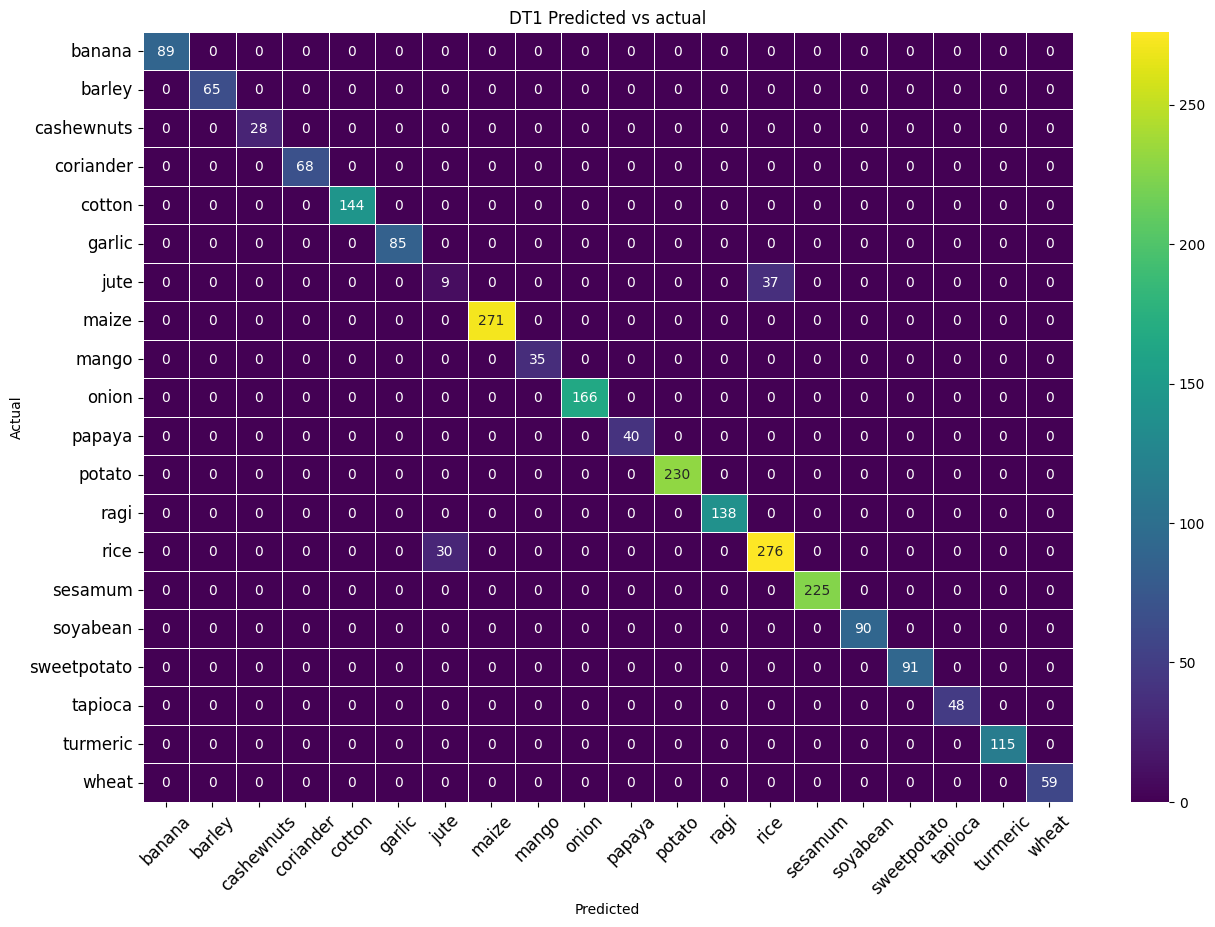

In [ ]:
#confusion matrix

y_pred = DT1.predict(X_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis',
            xticklabels=crop_labels, yticklabels=crop_labels, ax=ax, annot_kws={"size": 10})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('DT1 Predicted vs actual')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 80:20 split (DT2)

In [ ]:
print("80:20 Model (DT2) Evaluation")

predicted_values = DT2.predict(X_test2)
x = metrics.accuracy_score(y_test2, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DT2 Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test2,predicted_values, target_names=crop_labels))

80:20 Model (DT2) Evaluation
DT2 Decision Tree's Accuracy is:  96.72867222578576
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        59
      barley       1.00      1.00      1.00        46
  cashewnuts       1.00      1.00      1.00        18
   coriander       1.00      1.00      1.00        35
      cotton       1.00      1.00      1.00        96
      garlic       1.00      1.00      1.00        61
        jute       0.22      0.21      0.22        33
       maize       1.00      1.00      1.00       174
       mango       1.00      1.00      1.00        29
       onion       1.00      1.00      1.00       104
      papaya       1.00      1.00      1.00        31
      potato       1.00      1.00      1.00       156
        ragi       1.00      1.00      1.00        91
        rice       0.87      0.87      0.87       197
     sesamum       1.00      1.00      1.00       151
    soyabean       1.00      1.00      1.00        59


In [ ]:
score = cross_val_score(DT2, fitur, target,cv=10)
print('DT2 Cross validation score: ',score)

DT2 Cross validation score:  [0.96282051 0.97435897 0.94230769 0.97435897 0.9474359  0.96148909
 0.96148909 0.97175866 0.96790757 0.97817715]


In [ ]:
#Print Train Accuracy
dt_train_accuracy = DT2.score(X_train2,y_train2)
print("DT2 Training accuracy = ",DT2.score(X_train2,y_train2))

#Print Test Accuracy
dt_test_accuracy = DT2.score(X_test2,y_test2)
print("DT2 Testing accuracy = ",DT2.score(X_test2,y_test2))

DT2 Training accuracy =  0.9825208466966003
DT2 Testing accuracy =  0.9672867222578576


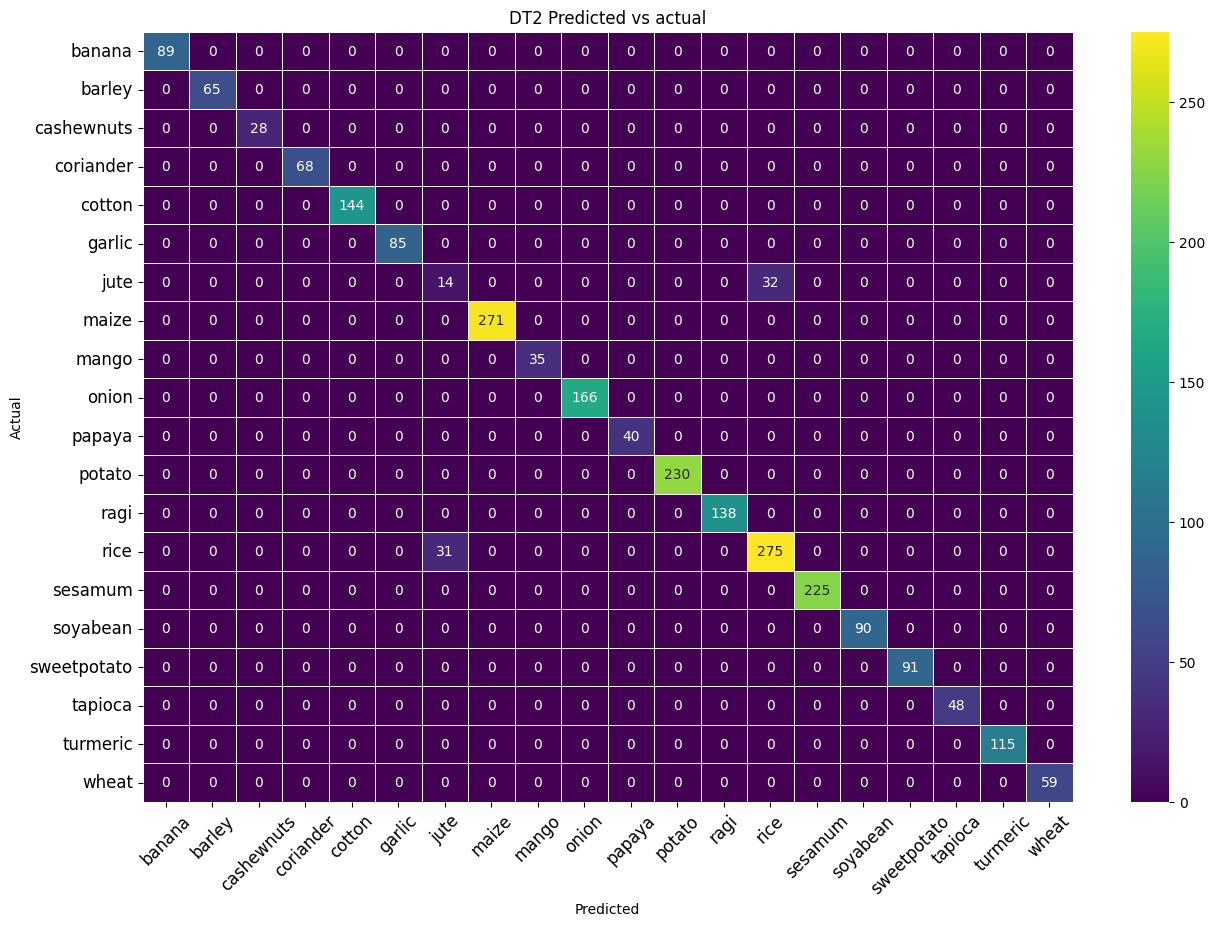

In [ ]:
#confusion matrix

y_pred = DT2.predict(X_test)
y_true = y_test

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis',
            xticklabels=crop_labels, yticklabels=crop_labels, ax=ax, annot_kws={"size": 10})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('DT2 Predicted vs actual')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Check features distribution

<ipython-input-34-2fc8a5893a4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filter_df, x='Crop', y=feature, palette='viridis')
<ipython-input-34-2fc8a5893a4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filter_df, x='Crop', y=feature, palette='viridis')
<ipython-input-34-2fc8a5893a4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filter_df, x='Crop', y=feature, palette='viridis')
<ipython-input-34-2fc8a5893a4f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

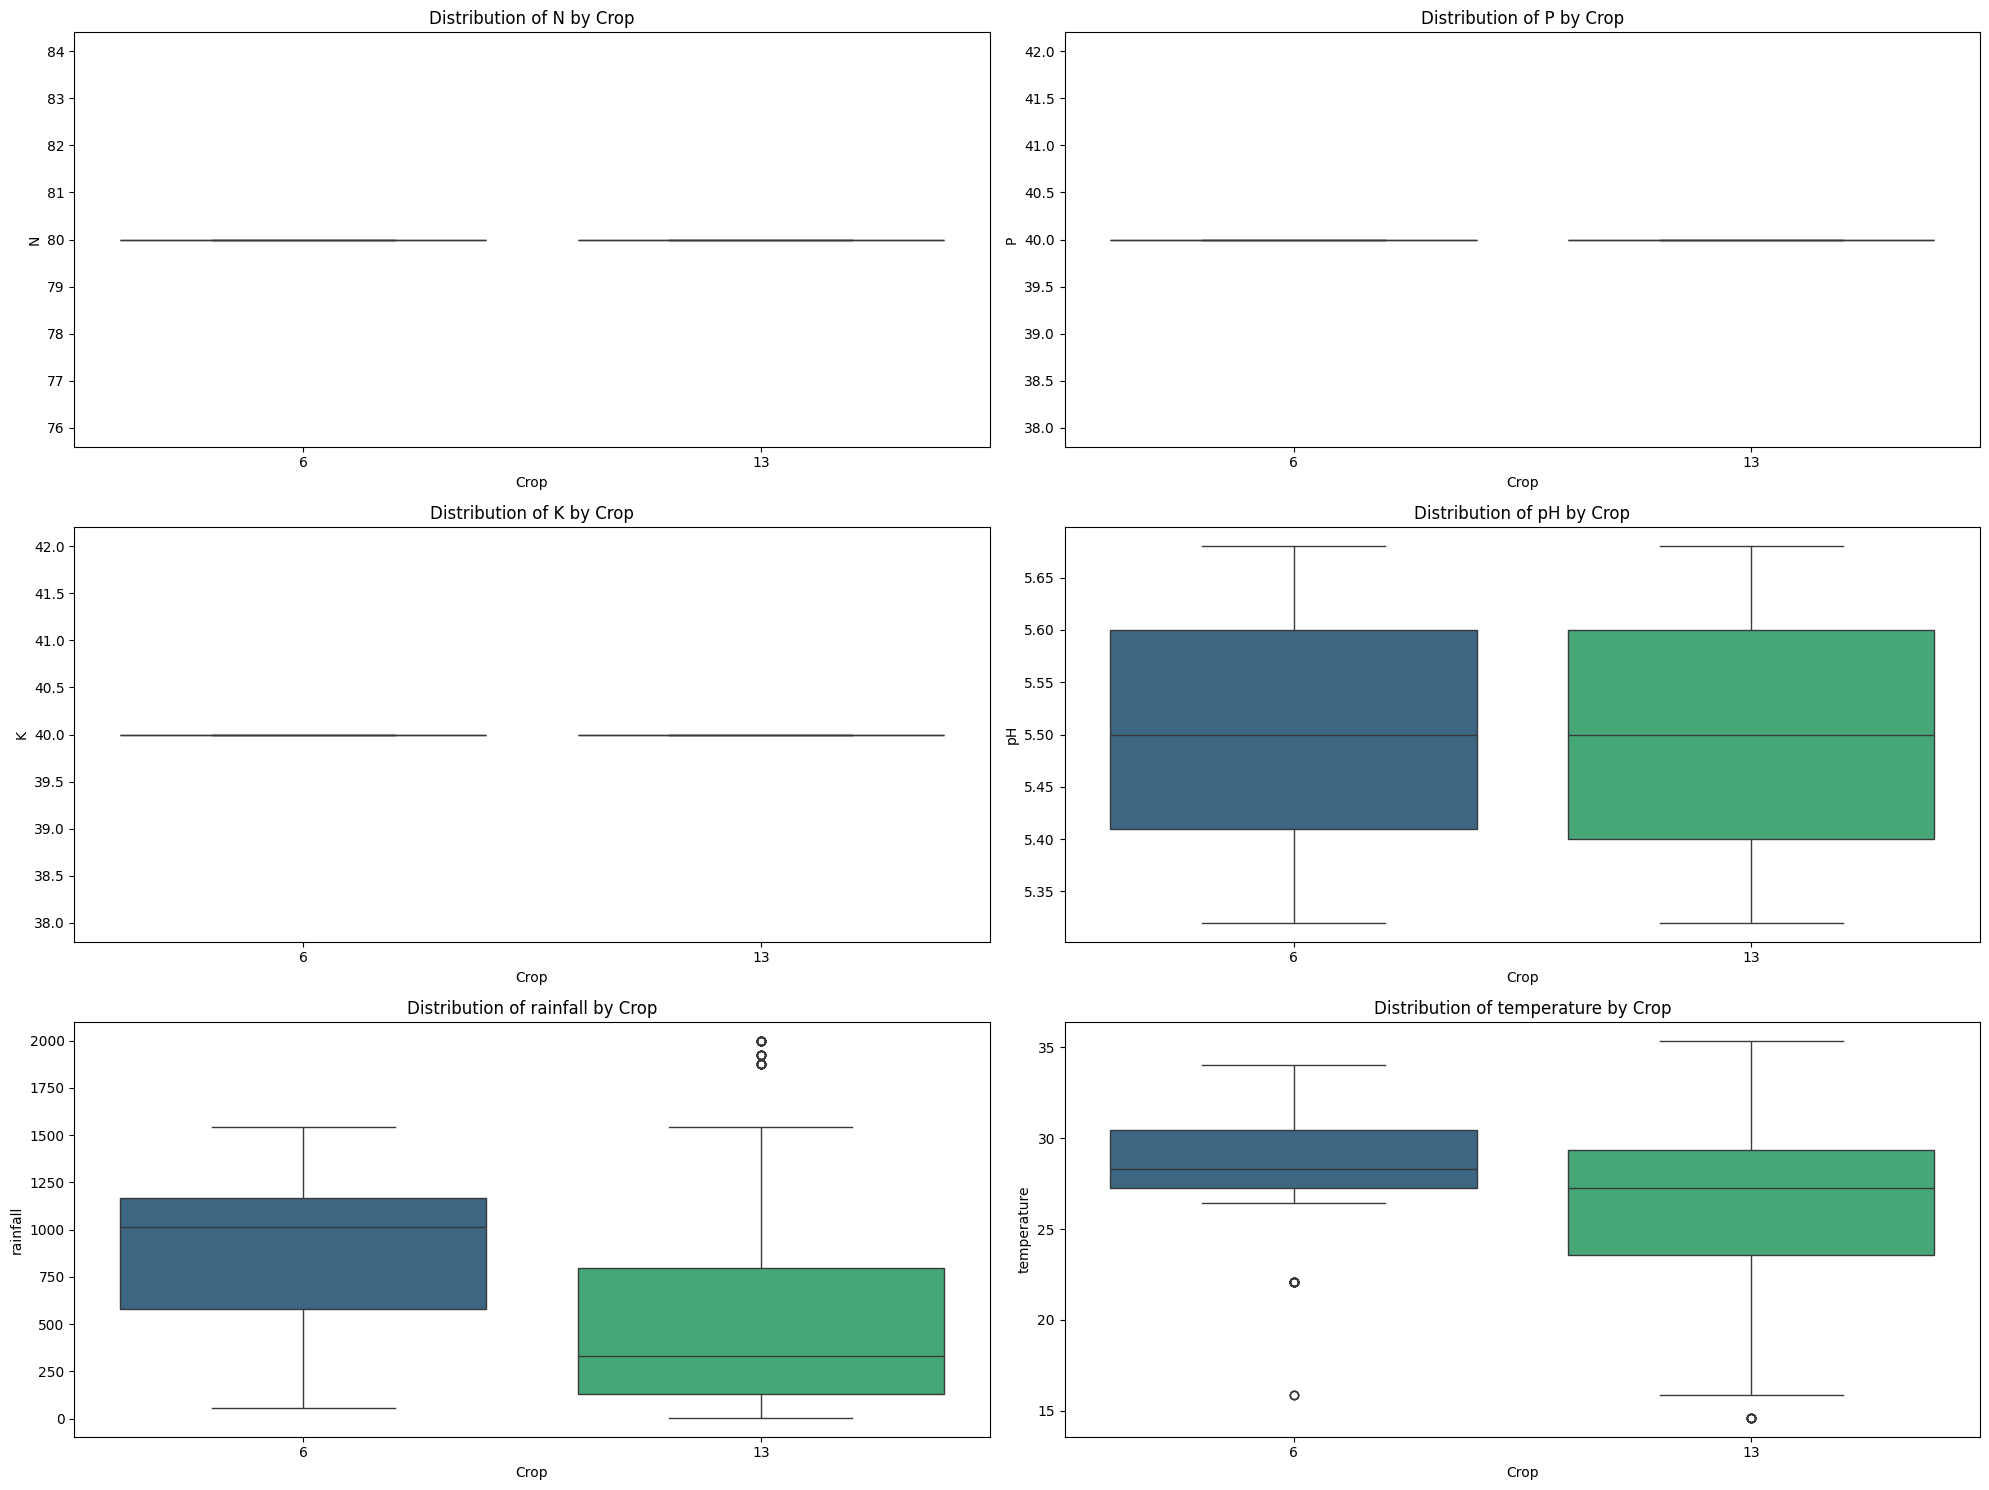

In [ ]:
#cek hubungan jute and rice

label_mapping = {label: i for i, label in enumerate(crop_labels)}

#find the encoded labels for 'jute' and 'rice'
jute_encoded = label_mapping['jute']
rice_encoded = label_mapping['rice']

filter_df = new_df[new_df['Crop'].isin([jute_encoded, rice_encoded])]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=filter_df, x='Crop', y=feature, palette='viridis')
    plt.title(f'Distribution of {feature} by Crop')
plt.tight_layout()
plt.show()

<ipython-input-38-ded8d4f00cfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Crop', y=feature, palette='viridis')
<ipython-input-38-ded8d4f00cfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Crop', y=feature, palette='viridis')
<ipython-input-38-ded8d4f00cfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_df, x='Crop', y=feature, palette='viridis')
<ipython-input-38-ded8d4f00cfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

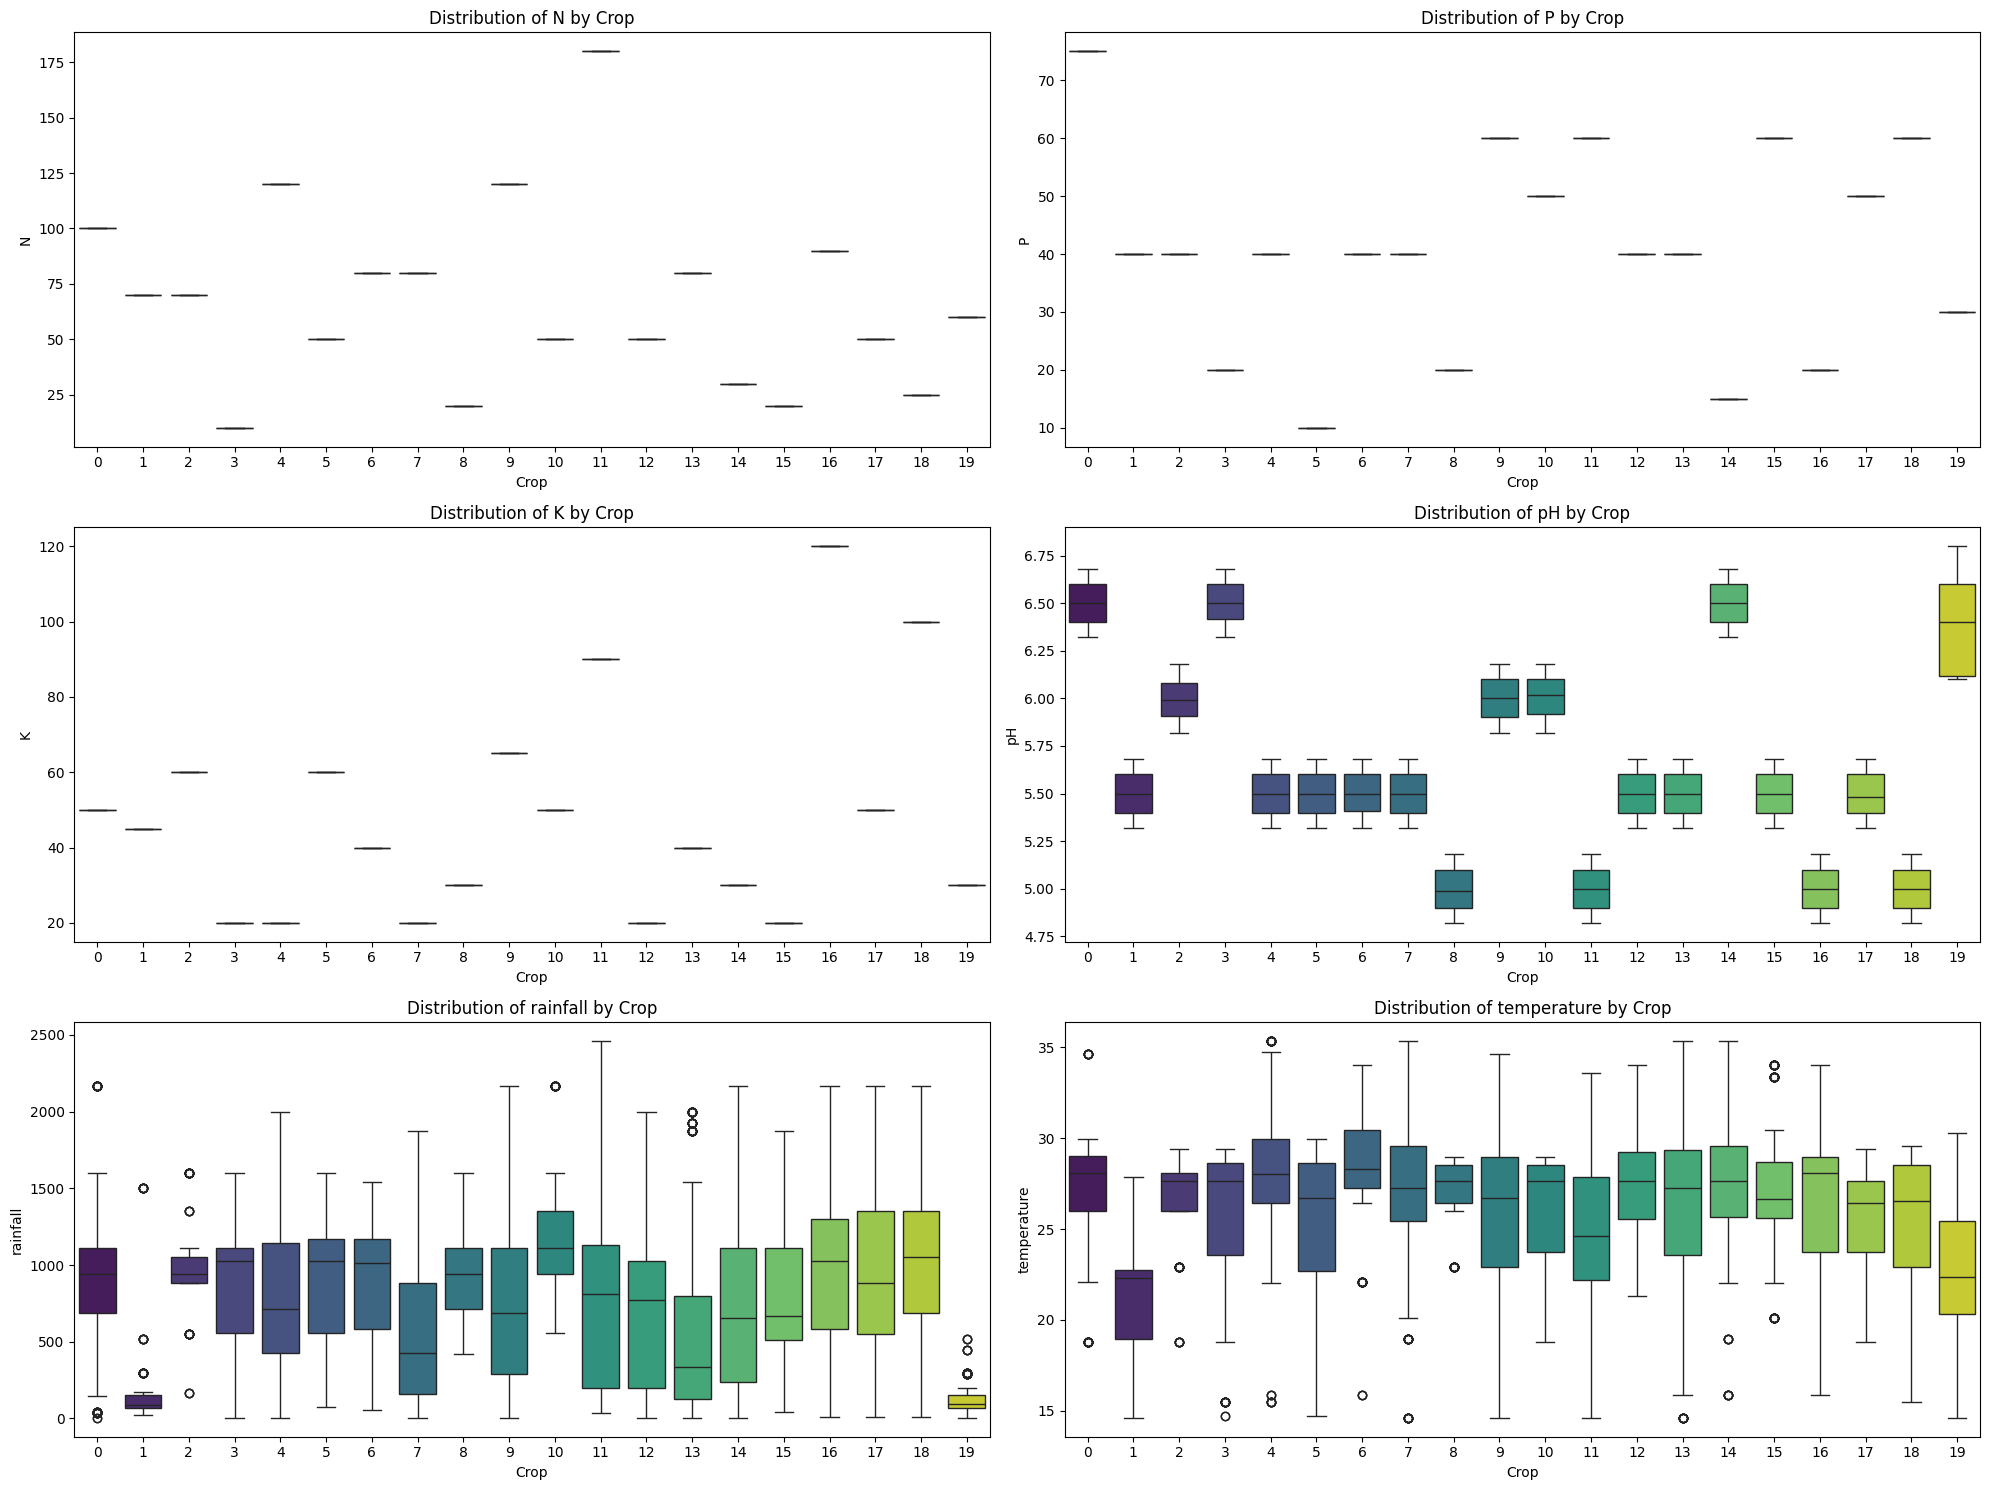

In [ ]:
#cek distribusi nilai fitur-fitur semua kelas

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=new_df, x='Crop', y=feature, palette='viridis')
    plt.title(f'Distribution of {feature} by Crop')
plt.tight_layout()
plt.show()

# Visualisasi Decision Tree (DT1)

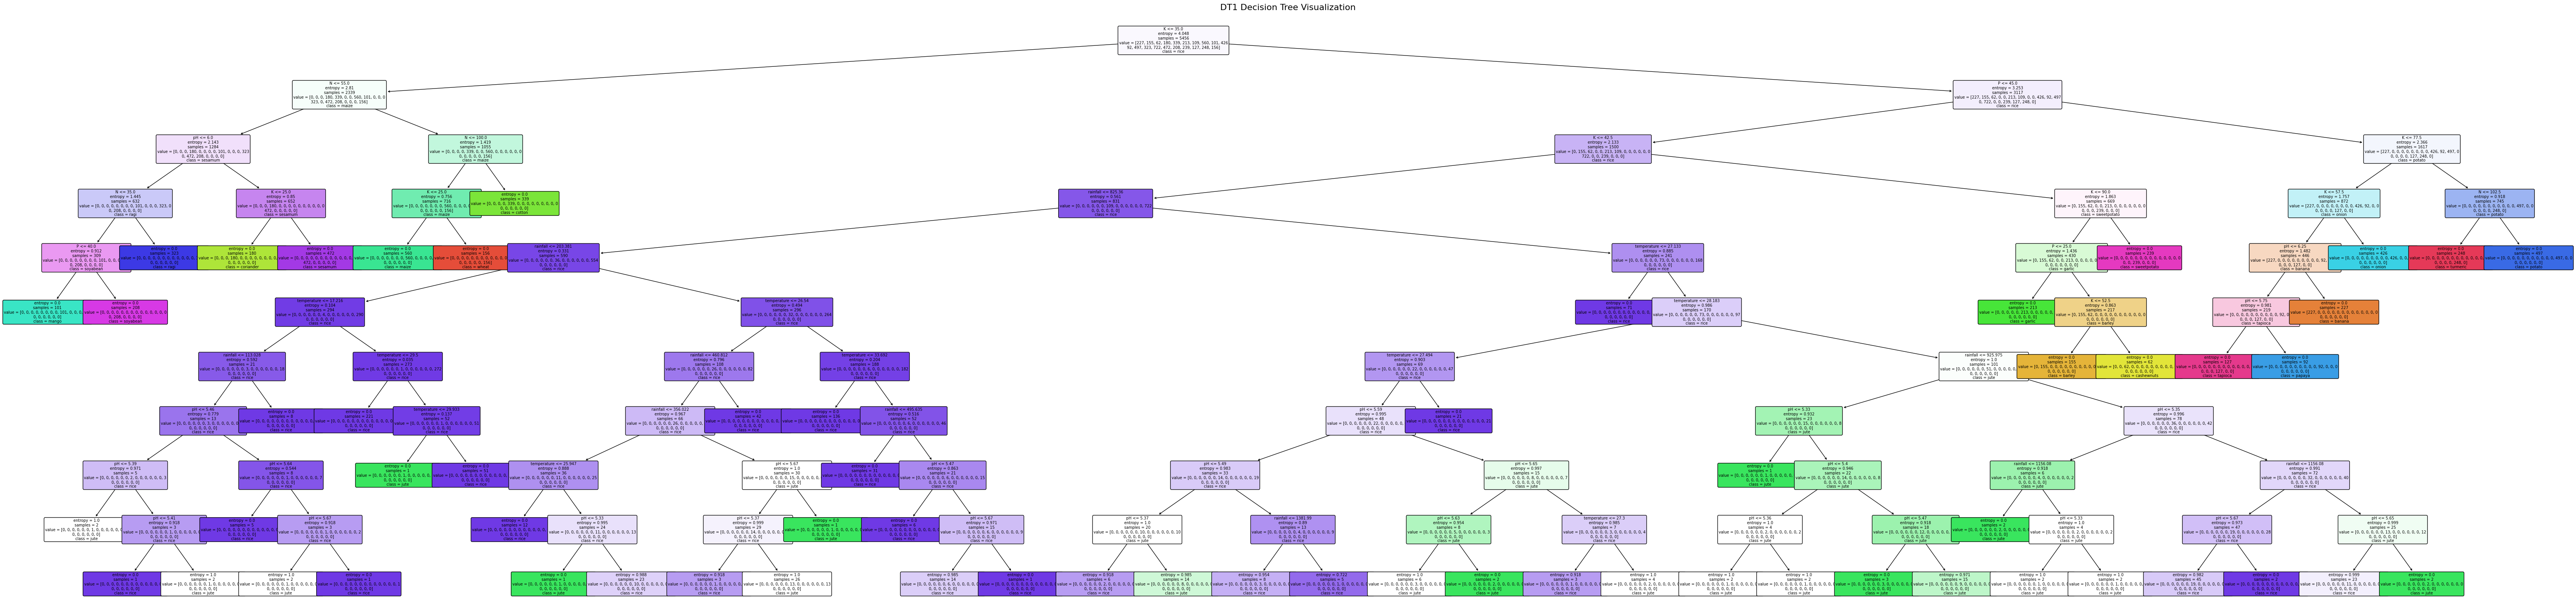

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(85, 20))

plot_tree(DT1,
          filled=True,
          rounded=True,
          feature_names=features,
          class_names=crop_labels,
          fontsize=7)

plt.title('DT1 Decision Tree Visualization', fontsize=16)
plt.show()